In [1]:
import numpy as np
from helper_code import *
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import neurokit2 as nk
from biosppy.signals import ecg

In [2]:
header_files, recording_files = find_challenge_files('data/data1')

Function to Plot Histogram of Recording Time Interval

In [3]:
def plot_time_interval_histogram(header_files,recording_files):
    time_list = list()
    num_recordings = len(recording_files)
    for i in range(num_recordings):
        header = load_header(header_files[i])
        fs = get_frequency(header)
        length = get_num_samples(header)
        time_list.append(length/fs)
    fig = plt.figure(figsize=(5,5))
    plt.hist(time_list)
    plt.show()

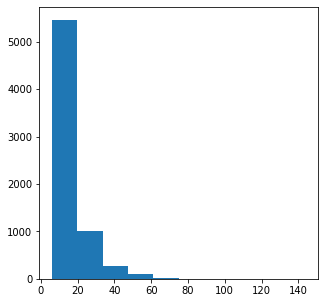

In [57]:
plot_time_interval_histogram(header_files, recording_files)

Function to Plot ECG

In [4]:
def plot_ecg_raw(header_file,recording_file):
    header = load_header(header_file)
    recording_temp = load_recording(recording_file)
    leads = get_leads(header)
    recording = choose_leads(recording_temp, header, leads)
    fs = get_frequency(header)
    num_leads = len(leads)
    length = get_num_samples(header)
    time_data = np.arange(length)/fs
    for i in range(num_leads):
        plt.figure()
        plt.figure(figsize=(30, 3))
        plt.plot(time_data,recording[i])
        plt.xlabel("time in seconds")
        plt.ylabel(leads[i])
        plt.show()

<Figure size 1440x720 with 0 Axes>

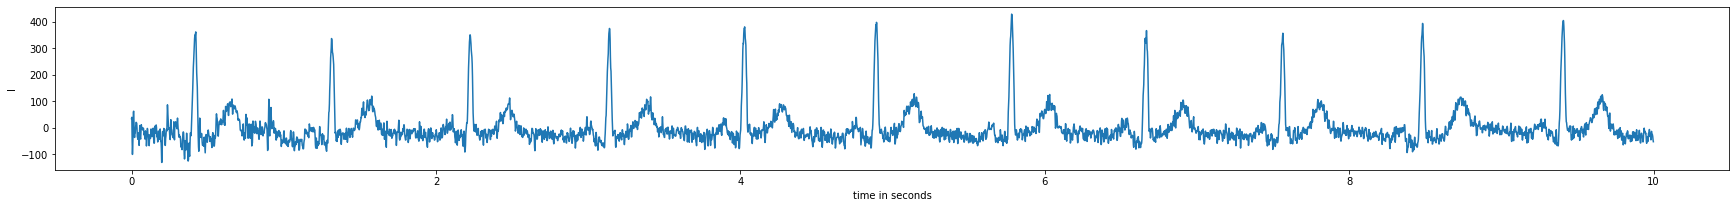

<Figure size 1440x720 with 0 Axes>

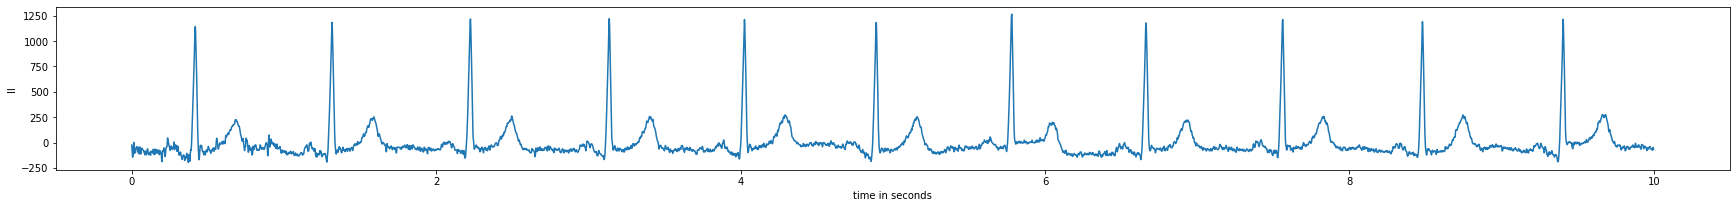

<Figure size 1440x720 with 0 Axes>

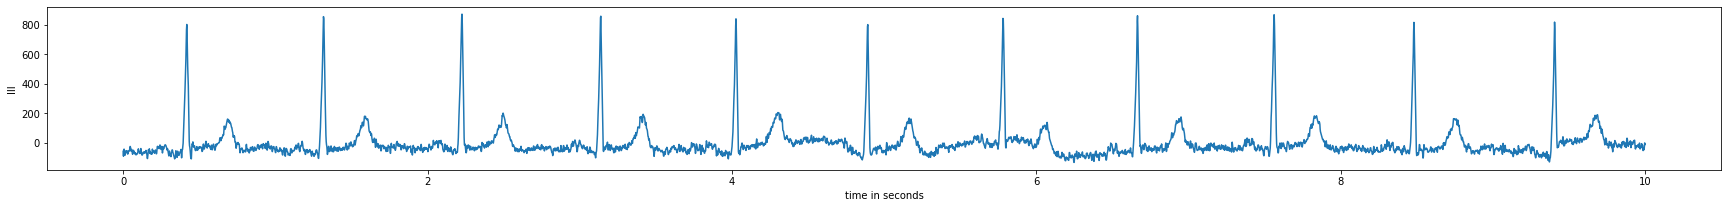

<Figure size 1440x720 with 0 Axes>

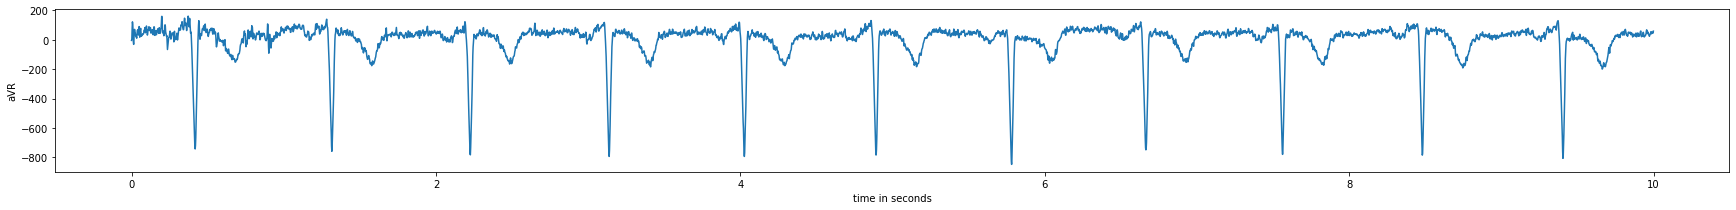

<Figure size 1440x720 with 0 Axes>

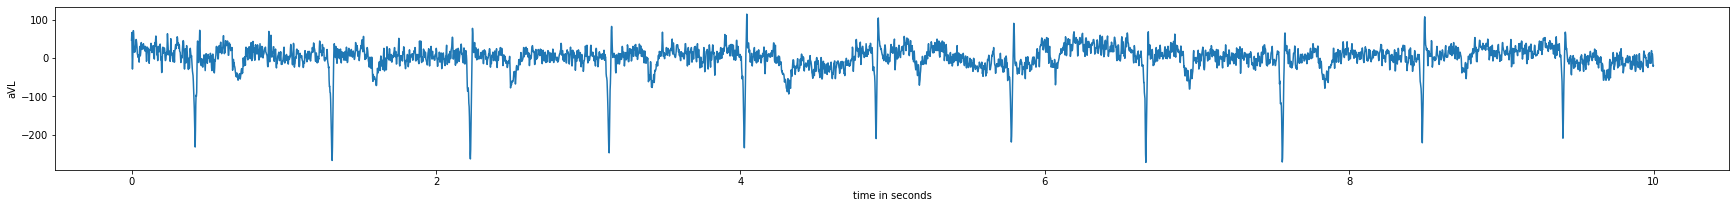

<Figure size 1440x720 with 0 Axes>

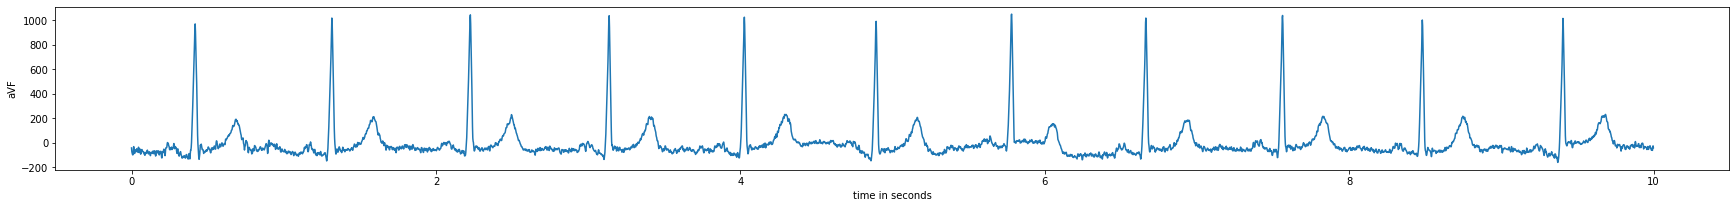

<Figure size 1440x720 with 0 Axes>

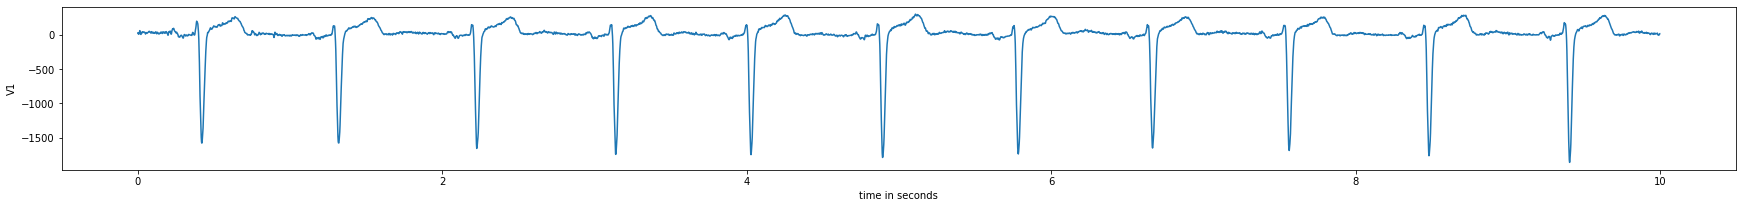

<Figure size 1440x720 with 0 Axes>

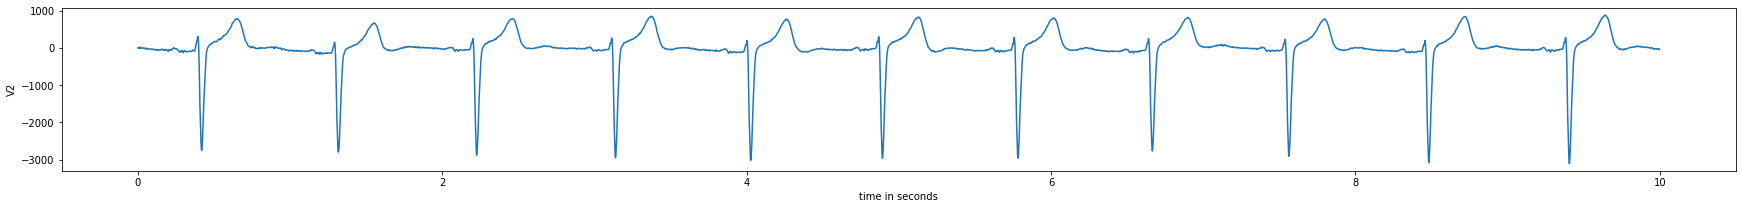

<Figure size 1440x720 with 0 Axes>

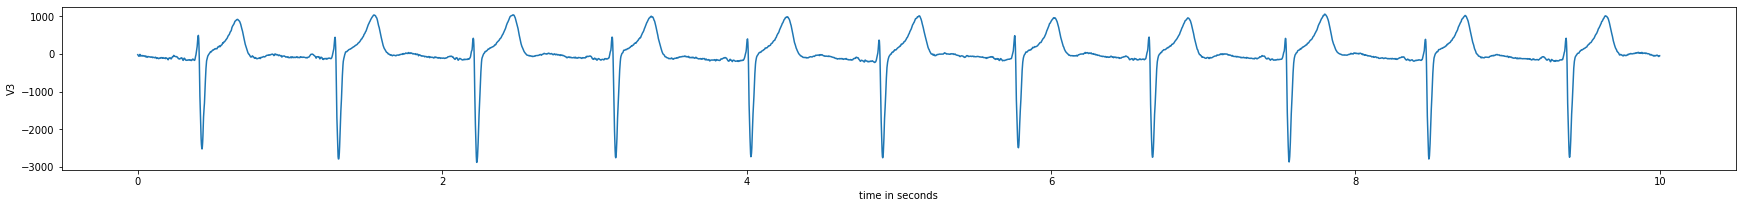

<Figure size 1440x720 with 0 Axes>

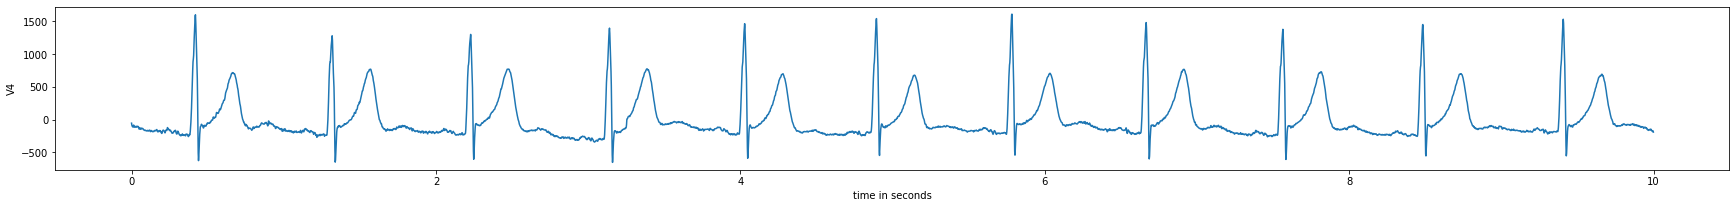

<Figure size 1440x720 with 0 Axes>

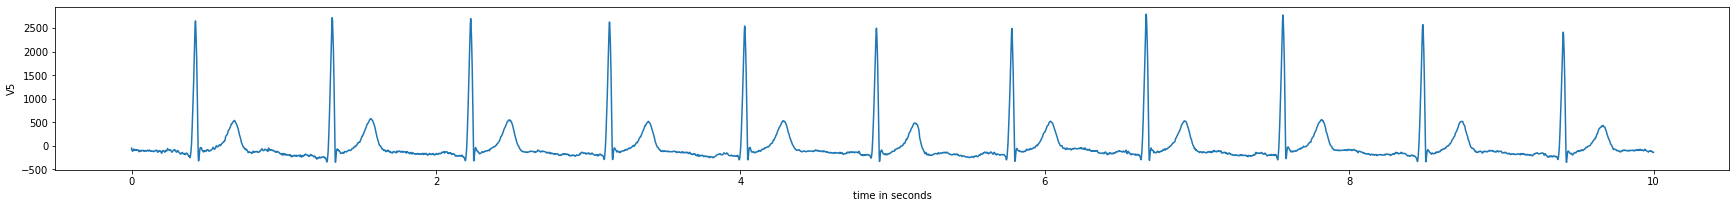

<Figure size 1440x720 with 0 Axes>

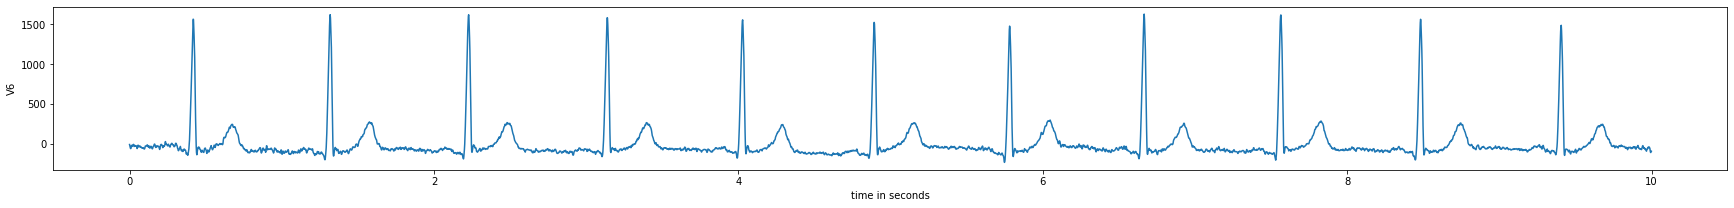

In [59]:
plot_ecg(header_files[20],recording_files[20])

Function to Get Code Abbreviation

In [5]:
with open('snomed_ct_code.txt') as f:
    mylist = f.read().splitlines()
dict = {}
for line in mylist:
    split_string = line.split(',')
    if split_string[1].isnumeric():
        dict_temp = {}
        dict_temp['short'] = split_string[2]
        dict_temp['full'] = split_string[0]
        dict[split_string[1]] = dict_temp

def get_disease(label,short = False):
    if short:
        return dict[label]['short']
    else :
        return dict[label]['full']

Function to Get Count of disease

In [6]:
def display_count_disease(header_files):
    dict = defaultdict(int)
    for header_file in header_files:
        header = load_header(header_file)
        labels = get_labels(header)
        for label in labels:
            dict[get_disease(label,True)] += 1
    plt.bar(list(dict.keys()), dict.values())
    plt.show()

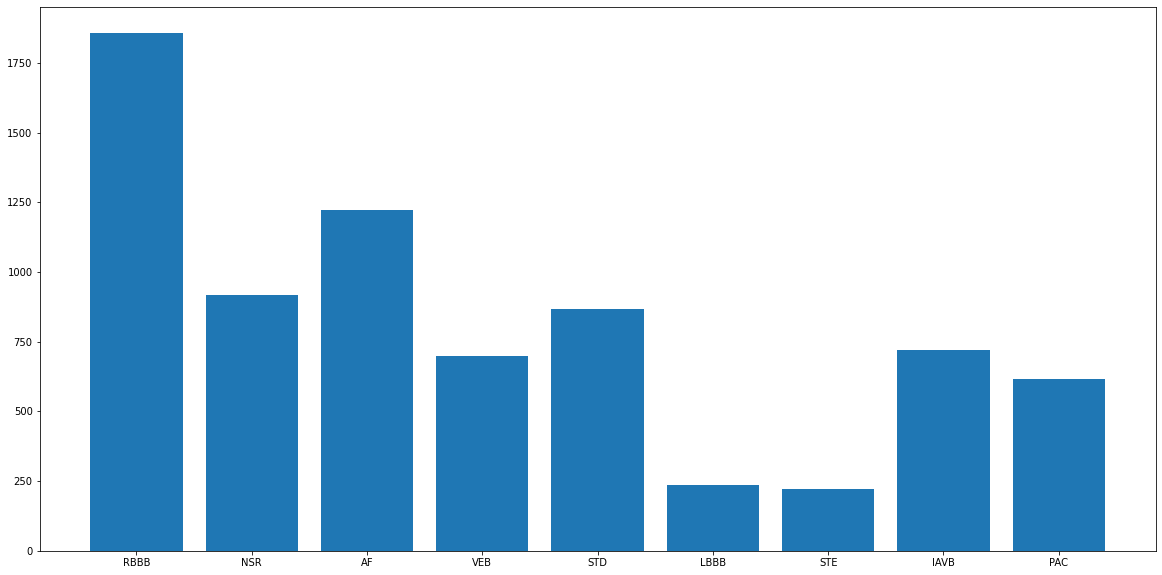

In [60]:
display_count_disease(header_files)

Function to Plot Leads of every disease

In [7]:
def plot_ecg_lead(header_file,recording_file,lead_name,id):
    header = load_header(header_file)
    recording_temp = load_recording(recording_file)
    leads = get_leads(header)
    recording = choose_leads(recording_temp, header, leads)
    fs = get_frequency(header)
    num_leads = len(leads)
    length = get_num_samples(header)
    time_data = np.arange(length)/fs
    for i in range(num_leads):
        if leads[i]==lead_name:
            plt.figure()
            plt.figure(figsize=(30, 3))
            plt.plot(time_data,recording[i])
            plt.xlabel("time in seconds")
            plt.ylabel(leads[i])
            plt.title("Plot of lead "+lead_name+" of Person number "+str(id+1))
            plt.show()
def plot_lead2_disease(header_files,recording_files,leads,count):
    dict = defaultdict(list)
    for i in range(len(recording_files)):
        header = load_header(header_files[i])
        labels = get_labels(header)
        for label in labels:
            disease = get_disease(label,True)
            dict[disease].append(i)
    def f(disease):
        counter = 0
        for index in dict[disease]:
            if counter == count:
                break
            counter = counter + 1
            for lead_name in leads:
                plot_ecg_lead(header_files[index],recording_files[index],lead_name,index)
    interact(f,disease = dict.keys())

In [62]:
plot_lead2_disease(header_files,recording_files,['II'],20)

interactive(children=(Dropdown(description='disease', options=('RBBB', 'NSR', 'AF', 'VEB', 'STD', 'LBBB', 'STE…

In [66]:
def mark_signal_biosppy(header_file,recording_file):
    header = load_header(header_file)
    recording_temp = load_recording(recording_file)
    leads = get_leads(header)
    recording = choose_leads(recording_temp, header, leads)
    fs = get_frequency(header)
    out = ecg.ecg(signal=recording[1], sampling_rate=fs, show=True)

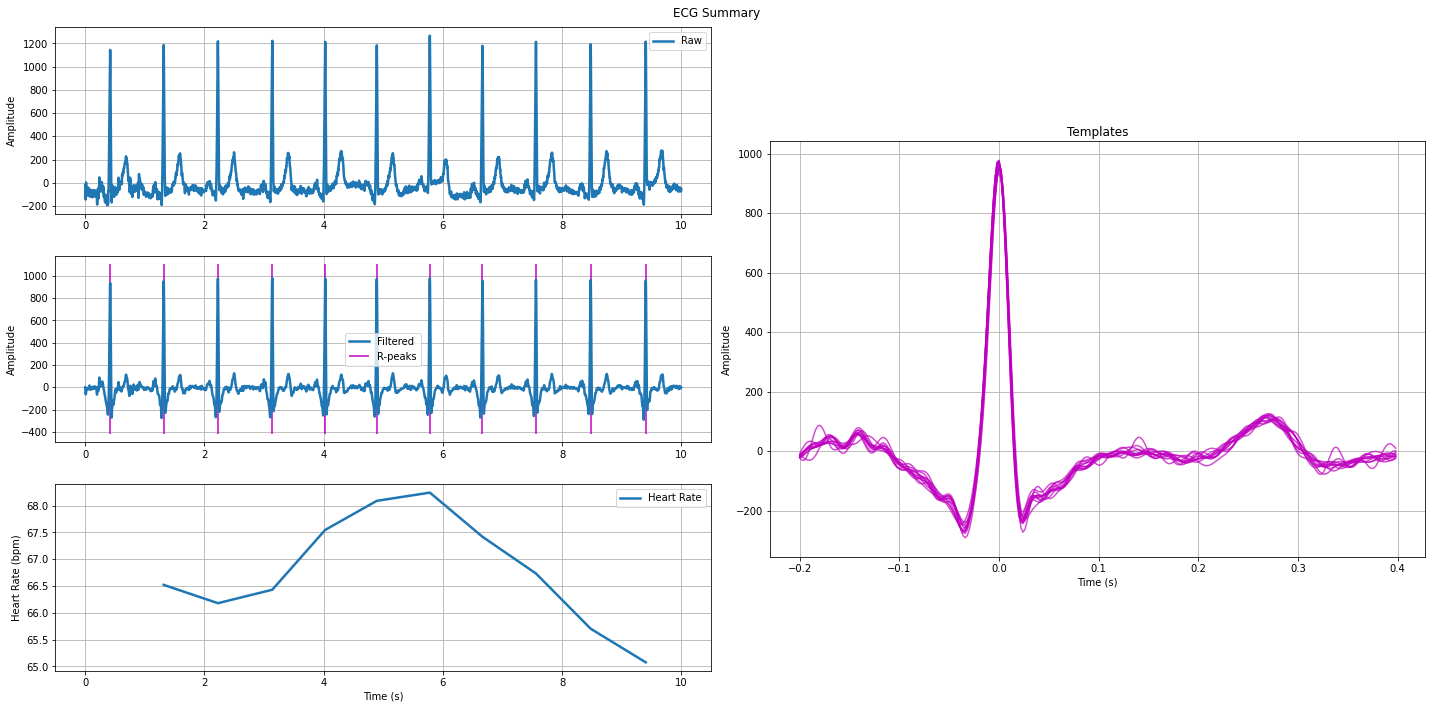

In [67]:
mark_signal_biosppy(header_files[20],recording_files[20])

In [44]:
def mark_signal_neurokit(header_file,recording_file):
    header = load_header(header_file)
    recording_temp = load_recording(recording_file)
    leads = get_leads(header)
    recording = choose_leads(recording_temp, header, leads)
    fs = get_frequency(header)
    for i in range(len(leads)):
        if leads[i]=='II':
            plt.rcParams['figure.figsize'] = [20, 10]
            signals, info = nk.ecg_process(recording[i], sampling_rate=fs)
            nk.ecg_plot(signals, sampling_rate=250)
            _, rpeaks = nk.ecg_peaks(signals[:2000], sampling_rate=fs)
            plot = nk.events_plot(rpeaks['ECG_R_Peaks'], signals[:2000])
            _, waves_peak = nk.ecg_delineate(signals[:2000], rpeaks, sampling_rate=fs)
            plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks']],
                        signals[:2000])
            print(info)

{'ECG_R_Peaks': array([ 208,  658, 1112, 1568, 2013, 2445, 2890, 3332, 3780, 4240, 4702]), 'sampling_rate': 500.0}


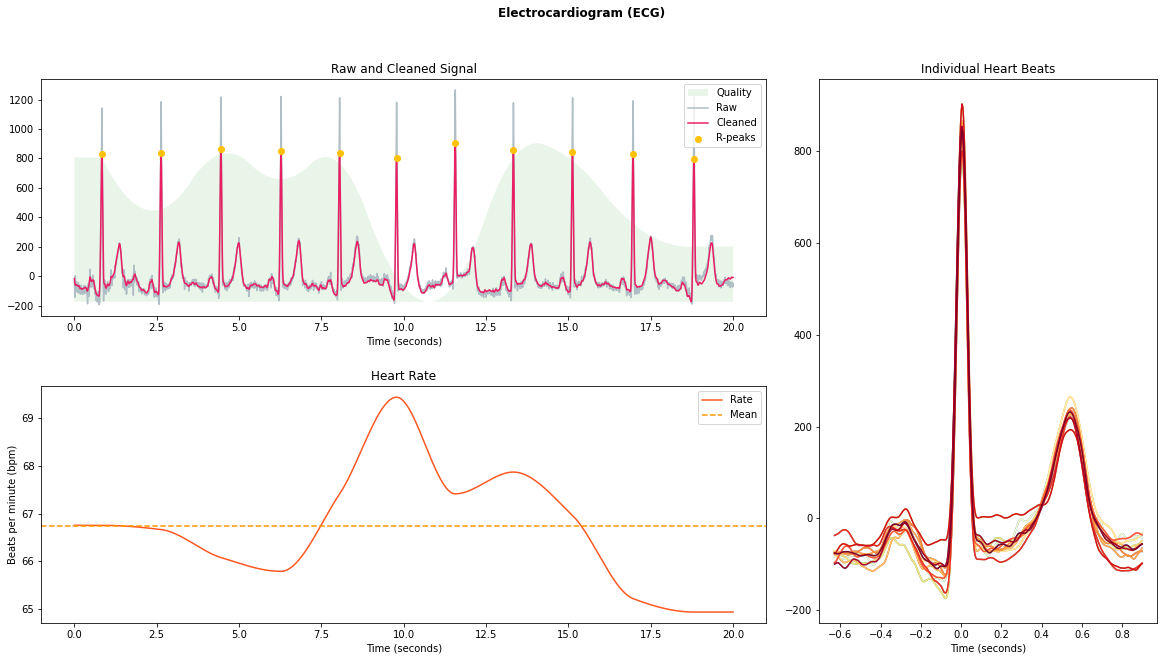

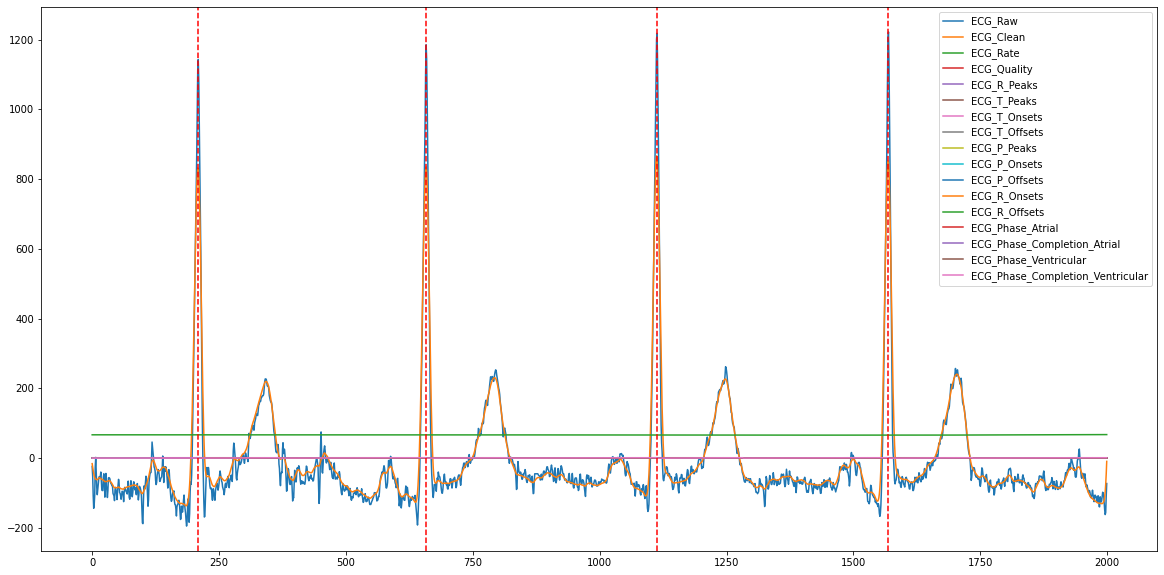

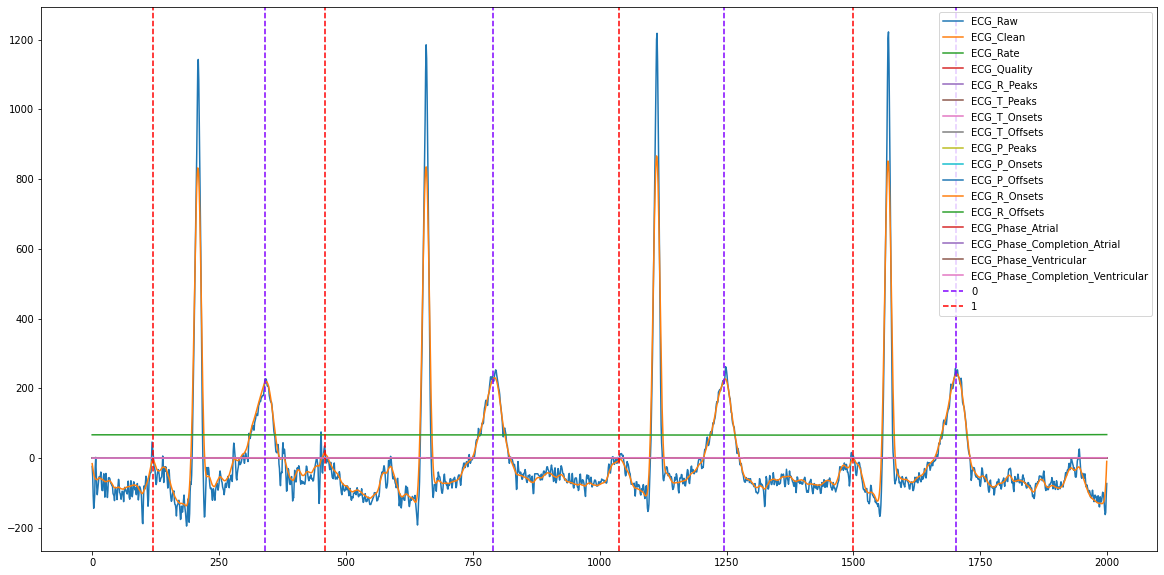

In [45]:
mark_signal_neurokit(header_files[20],recording_files[20])

In [5]:
def get_peaks(header_file,recording_file,lead):
    header = load_header(header_file)
    recording_temp = load_recording(recording_file)
    leads = get_leads(header)
    recording = choose_leads(recording_temp, header, leads)
    fs = get_frequency(header)
    for i in range(len(leads)):
        if lead == leads[i]:
            cleaned = nk.ecg_clean(recording[i], sampling_rate=fs)
            _, rpeaks = nk.ecg_peaks(cleaned, sampling_rate=fs)
            signal, waves = nk.ecg_delineate(cleaned, rpeaks, sampling_rate=fs, method="peak")
            peaks = {"ECG_P_Peaks":waves['ECG_P_Peaks'],"ECG_Q_Peaks":waves['ECG_Q_Peaks'],"ECG_R_Peaks":rpeaks['ECG_R_Peaks'],"ECG_S_Peaks":waves['ECG_S_Peaks'],"ECG_T_Peaks":waves['ECG_T_Peaks']}
            return peaks

In [6]:
def get(x):
    arr = list()
    for val in x:
        if(~np.isnan(val)):
            arr.append(val)
    return arr
def plot_ecg_marked(header_file,recording_file):
    header = load_header(header_file)
    recording_temp = load_recording(recording_file)
    leads = get_leads(header)
    recording = choose_leads(recording_temp, header, leads)
    fs = get_frequency(header)
    num_leads = len(leads)
    length = get_num_samples(header)
    time_data = np.arange(length)/fs
    for i in range(num_leads):
        peaks = get_peaks(header_file,recording_file,leads[i])
        cleaned = nk.ecg_clean(recording[i], sampling_rate=fs)
        plt.figure()
        plt.figure(figsize=(30, 3))
        plt.plot(time_data,cleaned,markevery = get(peaks['ECG_R_Peaks']),color="lightsteelblue",marker="o",markerfacecolor='blue',markersize=12,label="R_Peaks")
        plt.plot(time_data,cleaned,markevery = get(peaks['ECG_P_Peaks']),color="lightsteelblue",marker="o",markerfacecolor='red',markersize=12,label="P_Peaks")
        plt.plot(time_data,cleaned,markevery = get(peaks['ECG_Q_Peaks']),color="lightsteelblue",marker="o",markerfacecolor='green',markersize=12,label="Q_Peaks")
        plt.plot(time_data,cleaned,markevery = get(peaks['ECG_S_Peaks']),color="lightsteelblue",marker="o",markerfacecolor='pink',markersize=12,label="S_Peaks")
        plt.plot(time_data,cleaned,markevery = get(peaks['ECG_T_Peaks']),color="lightsteelblue",marker="o",markerfacecolor='olive',markersize=12,label="T_Peaks")
        plt.xlabel("time in seconds")
        plt.ylabel(leads[i])
        plt.legend(loc = 'upper right')
        plt.show()

<Figure size 432x288 with 0 Axes>

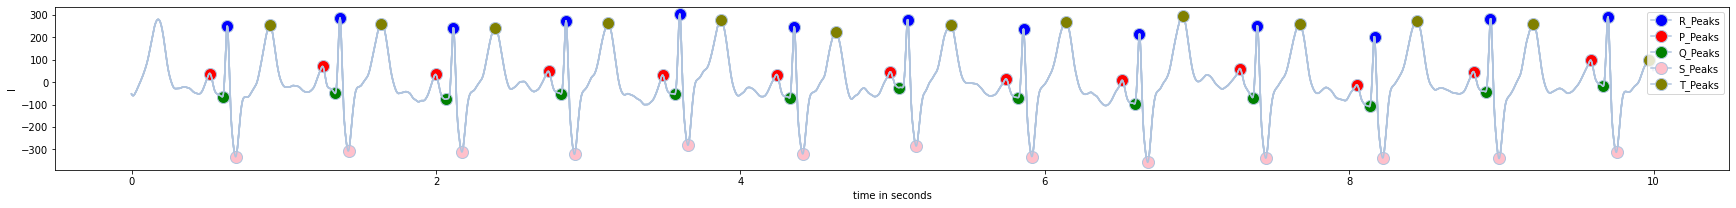

<Figure size 432x288 with 0 Axes>

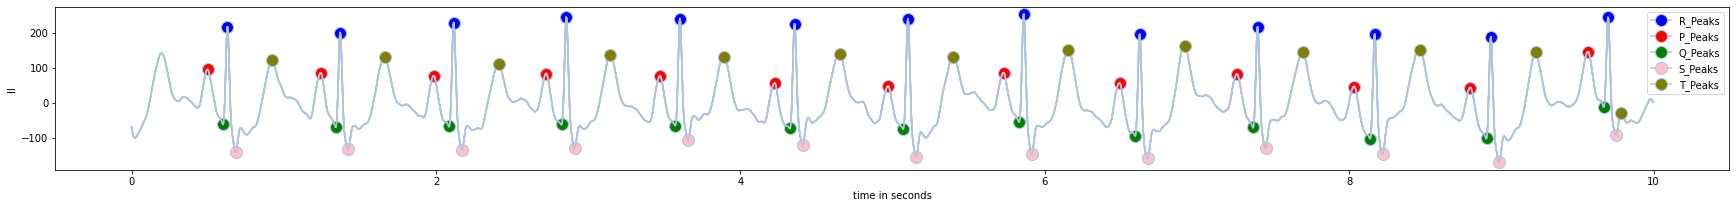

<Figure size 432x288 with 0 Axes>

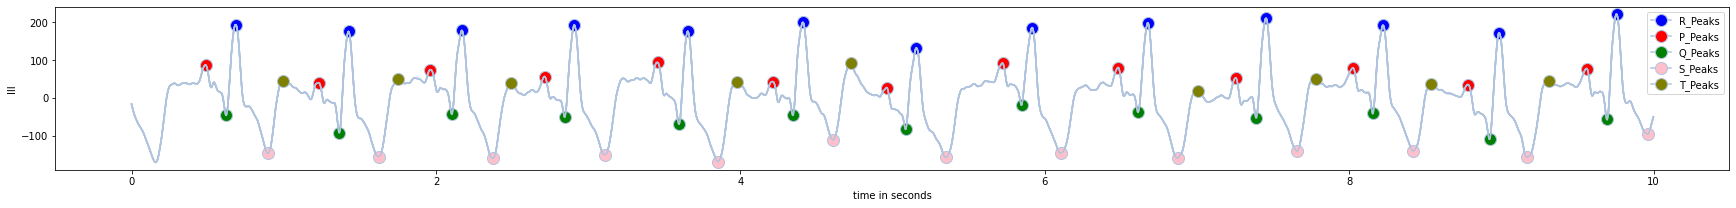

<Figure size 432x288 with 0 Axes>

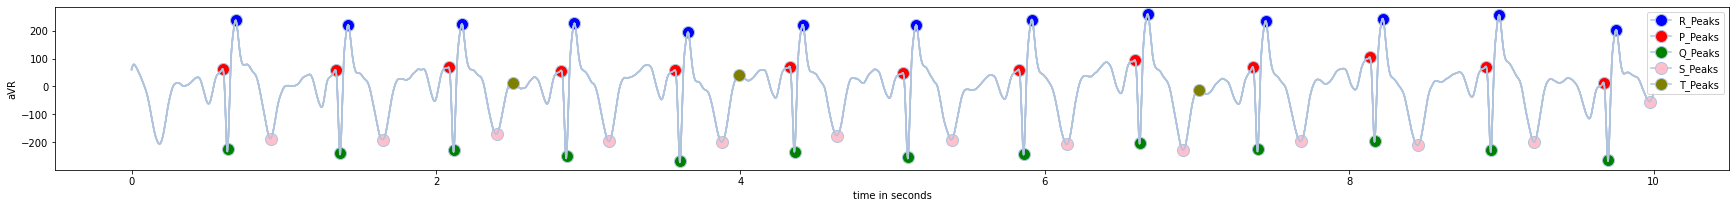

<Figure size 432x288 with 0 Axes>

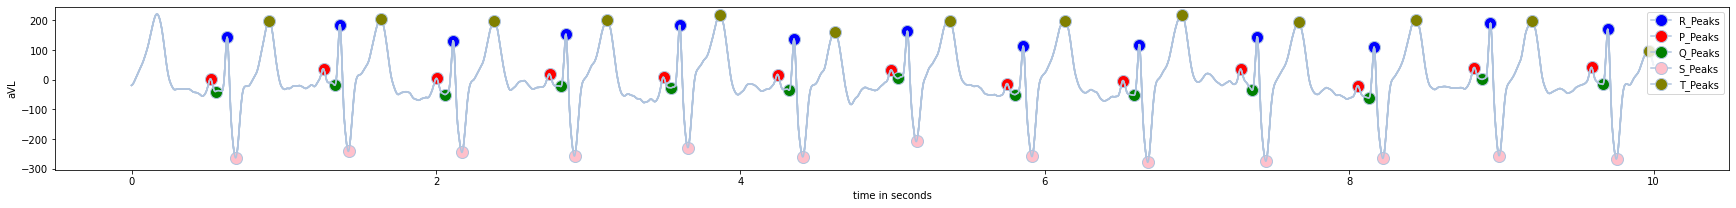

<Figure size 432x288 with 0 Axes>

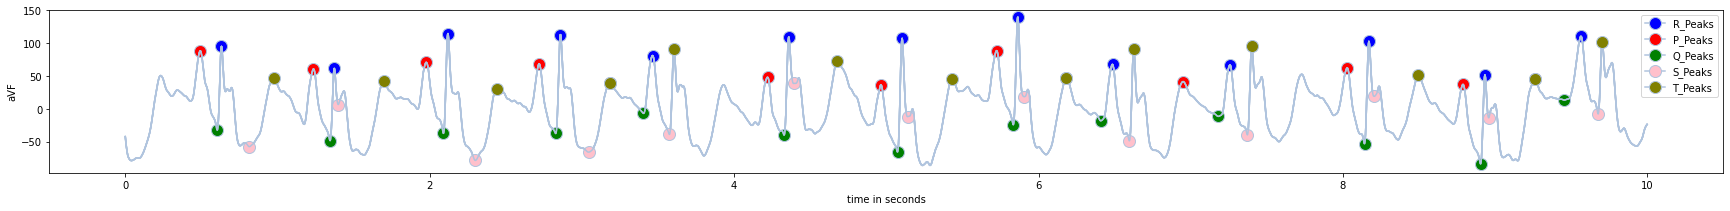

<Figure size 432x288 with 0 Axes>

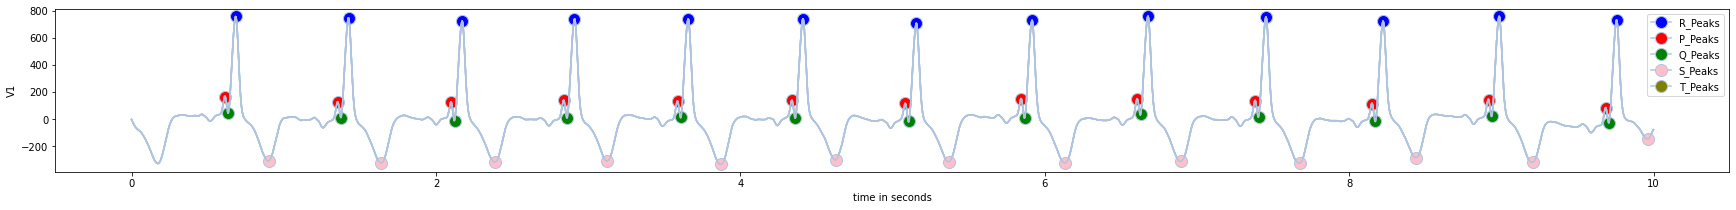

<Figure size 432x288 with 0 Axes>

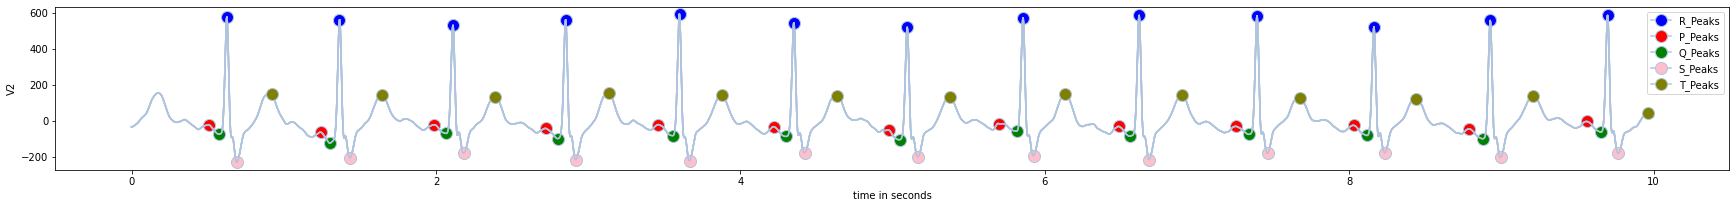

<Figure size 432x288 with 0 Axes>

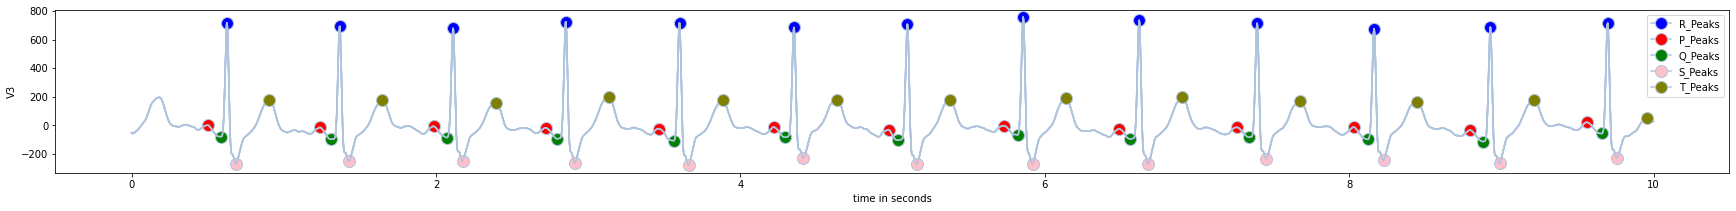

<Figure size 432x288 with 0 Axes>

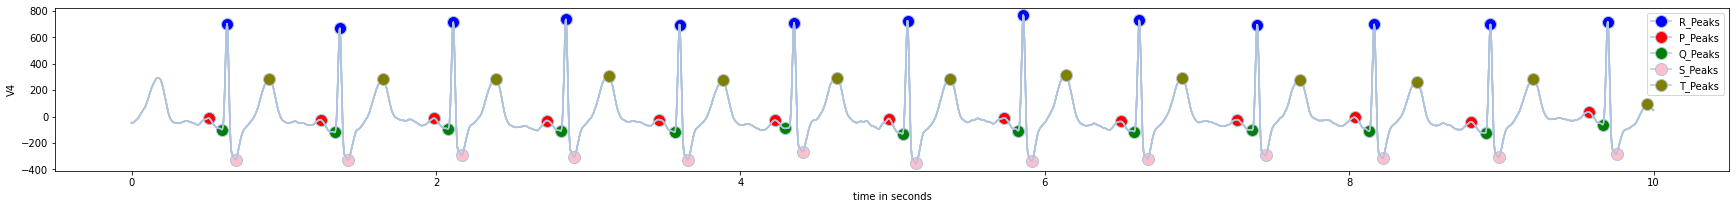

<Figure size 432x288 with 0 Axes>

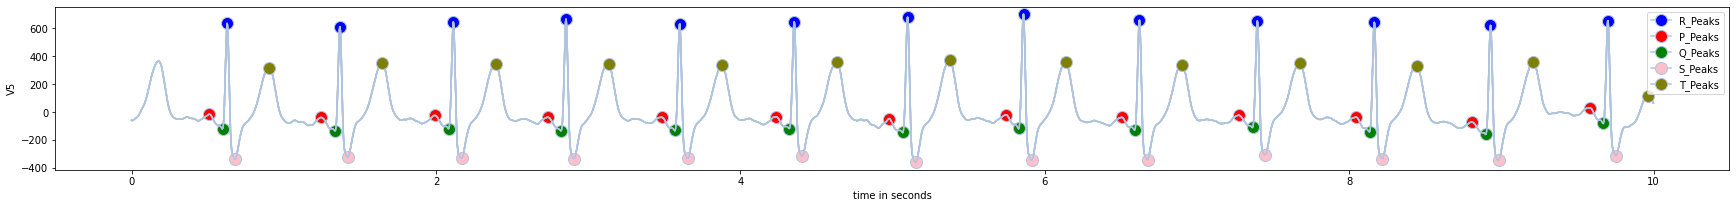

<Figure size 432x288 with 0 Axes>

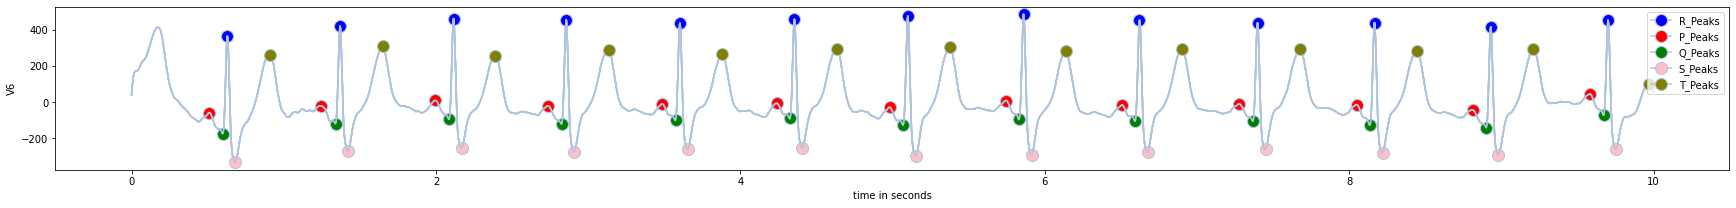

In [7]:
plot_ecg_marked(header_files[50], recording_files[50])